# Milestones 2 Phase 1
Nama  : William

Batch : RMT-020

Dataset : [Card Price](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)

Objective :mengumpulkan data tentang berbagai fitur mobil, seperti merek, model, tahun produksi, volume mesin, jarak tempuh, jumlah pintu, dan fitur keselamatan lainnya. Model prediksi harga mobil kemudian dibangun dengan menggunakan algoritma machine learning seperti regresi linier, decision tree, atau random forest. Model ini akan digunakan untuk memprediksi harga mobil berdasarkan fitur-fitur yang ada, sehingga dapat membantu calon pembeli atau penjual mobil dalam menentukan harga yang sesuai.

# Import Libraries

In [196]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score , KFold
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error
from joblib import dump, load

# Mengatur opsi tampilan untuk menampilkan angka tanpa notasi pangkat
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.00,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.00,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.00,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.00,Automatic,Front,04-May,Left wheel,Black,4


sebelum melakukan eksplorasi data, saya mengubah tipe data dari kolom-kolom yang ada

In [3]:
df.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [4]:
df['Levy'].value_counts()

Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

pada kolom dooors saya mengubah value nya menjadi hanya angka saja dan pada kolom levy ada value "-" dimana akan saya ubah menjadi missing value

In [5]:
df['Levy'] = df['Levy'].replace({'-' : None})
df['Doors'] = df['Doors'].replace({'04-May' : 4,'02-Mar' : 2, '>5' : 5})

In [6]:
df['Levy'].value_counts()

Levy
765     486
891     461
639     410
640     405
1017    298
       ... 
3156      1
2908      1
1279      1
1719      1
1901      1
Name: count, Length: 558, dtype: int64

In [7]:
df['Doors'].unique()

array([4, 2, 5], dtype=int64)

value dari kedua kolom tersebut telah diubah

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

selanjutnya saya mengubah tipe data dari kolom levy menjadi numerikal dikarenakan sebelumnnya ialah berbentuk string

In [9]:
df['Levy'] = df['Levy'].astype('float64')

pada kolom mileage ada gabungan jarak yaitu kilometer, disini saya akan menghapus satuan jaraknya sehingga kolom mileage dapat menjadi kolom numerikal

In [10]:
df['Mileage'].value_counts()

Mileage
0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: count, Length: 7687, dtype: int64

In [11]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]

In [12]:
df['Mileage'].value_counts()

Mileage
0         721
200000    183
150000    161
160000    120
100000    119
         ... 
63083       1
28750       1
25077       1
77452       1
186923      1
Name: count, Length: 7687, dtype: int64

In [13]:
df['Mileage'] = df['Mileage'].astype('float64')

selanjutnya data pada kolom engine volume juga harusnya ialah berbentuk float tetapi dikarenakan ada kata turbo pada  kolom tersebut maka saya akan memisahkan nya menjadi 2 kolom sehingga kolom baru nya ialah Turbo yang merupakan kolom dengan tipe data boolean dan saya mengubah tipe data dari kolom engine volume menjadi float

In [14]:
df['Turbo'] = df['Engine volume'].str.contains('Turbo')
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

In [15]:
df['Leather interior'] = df['Leather interior'].replace({'Yes' : True , 'No' : False})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  bool   
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

tipe data yang akan digunakan telah sesuai dengan yang diharapkan

# Exploratory Data Analysis ( EDA )

<Axes: xlabel='Prod. year', ylabel='Count'>

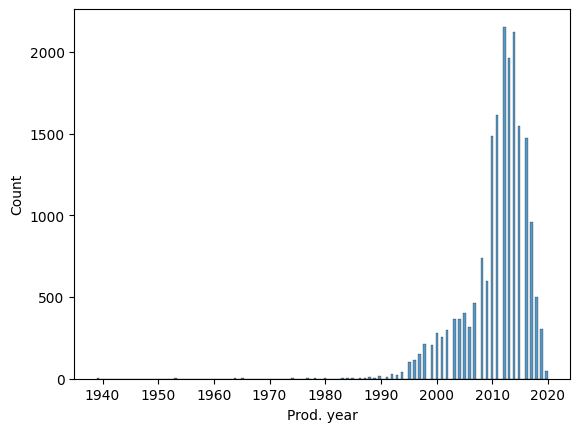

In [17]:
sns.histplot(df['Prod. year'])

mobil yang ada pada dataset ini kebanyakan diproduksi pada rentang tahun 2010-2020, tetapi ada juga mobil-mobil tua yang di produksi pada tahun 1900-an

<Axes: >

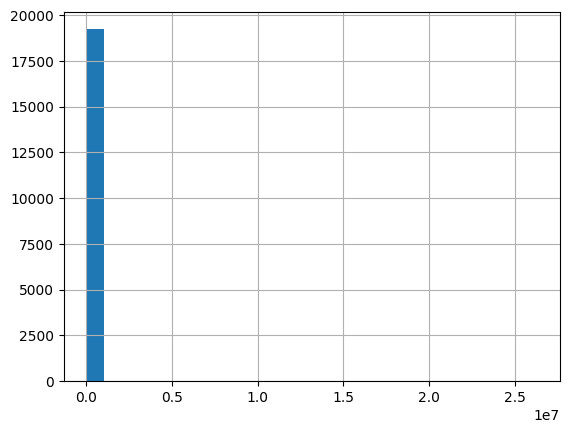

In [18]:
df['Price'].hist(bins=25)

plot diatas menunjukkan bahwa harga mobil berkisar di antara 0-150 ribu dollar tetapi ada harga yang tidak normal bernilai sekitar 25 juta dollar

In [19]:
df[df.Price == df.Price.max()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,45812886,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.70,99999.00,4.00,Manual,Front,2,Left wheel,Blue,0,False


dan benar saja ternyata ada data yang tidak normal bernilai 26 juta dollar dimana seharusnya mobil jenis ini hanya berkisar di harga 5-10 ribu dollar

<Axes: xlabel='Fuel type', ylabel='count'>

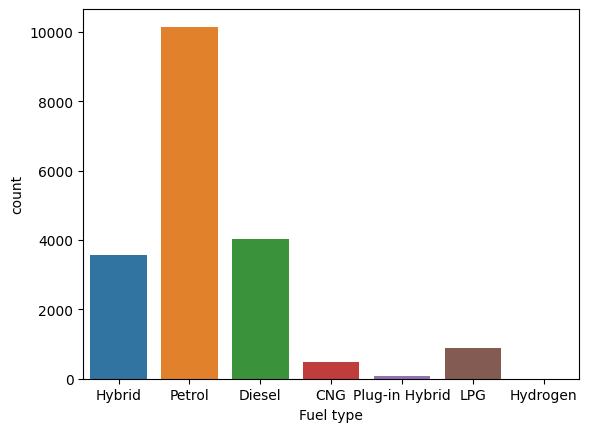

In [20]:
sns.countplot(data=df,x='Fuel type')

sebagian besar mobil disini masih menggunakan petrol sebagai bahan bakar nya

<Axes: xlabel='Category', ylabel='count'>

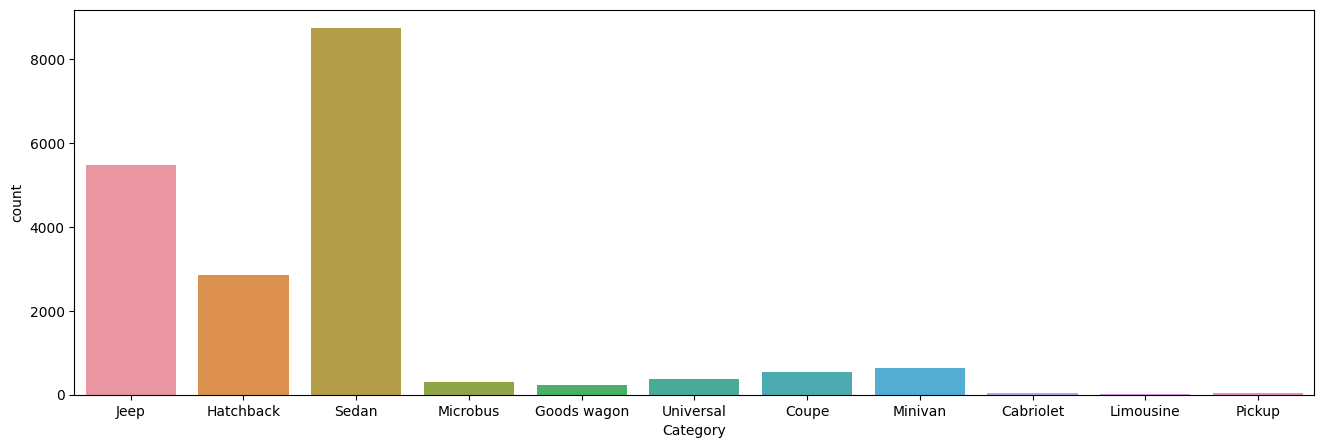

In [21]:
plt.figure(figsize=(16,5))
sns.countplot(x='Category',data=df)

kategori mobil terbanyak ialah sedan, jeep lalu diikuti oleh hatchback, untuk yang lain jumlah nya tidak terlalu banyak

<Axes: xlabel='Airbags', ylabel='count'>

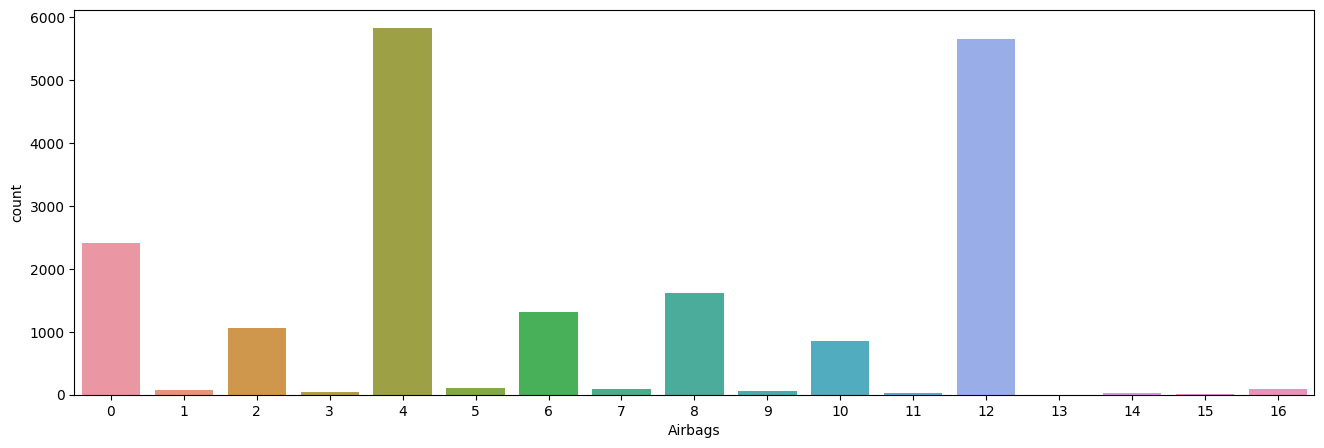

In [22]:
plt.figure(figsize=(16,5))
sns.countplot(x='Airbags',data=df)

rata-rata mobil memiliki 4 atau 12 airbags

In [23]:
df['Manufacturer'].value_counts()[:10]

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
Name: count, dtype: int64

disini hyundai dan toyota ialah manufaktur yang data nya paling banyak ada di dataset

In [24]:
df.groupby('Fuel type')['Price'].median()

Fuel type
CNG               7527.00
Diesel           20489.50
Hybrid           10036.00
Hydrogen         20385.00
LPG              11604.00
Petrol           12858.00
Plug-in Hybrid   22737.00
Name: Price, dtype: float64

disini saya mengecek apakah jenis bahan bakar berperan penting terhadap harga mobil, dan dapat dilihat pada mobil plug-in hybrid harga nya paling mahal jika dibandingkan dengan yang lain

In [25]:
df.groupby(['Doors','Drive wheels'])['ID'].count()

Doors  Drive wheels
2      4x4               113
       Front             295
       Rear              369
4      4x4              3907
       Front           12521
       Rear             1904
5      4x4                38
       Front              58
       Rear               32
Name: ID, dtype: int64

mobil yang paling banyak ada di dataset ini ialah mobil dengan 4 pintu dan penggerak roda depan

In [187]:
df.groupby('Turbo')['Price'].median()

Turbo
False   12276.50
True    19444.00
Name: Price, dtype: float64

In [188]:
df.groupby('Leather interior')['Price'].median()

Leather interior
False   11604.00
True    14113.00
Name: Price, dtype: float64

mobil dengan mesin yang dilengkapi turbo harganya cenderung lebih tinggi daripada yang tidak ada turbonya. begitu juga dengan interior yang menggunakan kulit. harga nya relatif lebih tinggi daripada yang tidak menggunakan kulit

<Axes: >

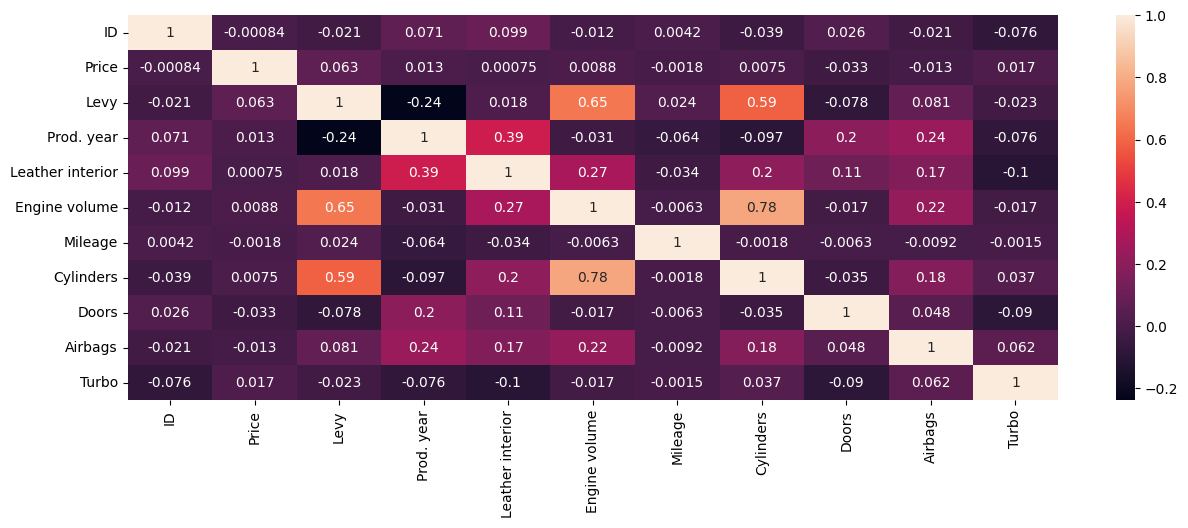

In [212]:
plt.figure(figsize=(15,5))
b = df.corr(numeric_only=True)
sns.heatmap(b,annot=True)

dikarenakan semua fitur numeric tidak ada yang korelasi nya tinggi dengan harga, saya akan menggunakan semua kolom yang ada

# Preprocessing Data

## Splitting Feature & Target

In [28]:
X = df.drop(['ID','Price'],axis=1) # Memisahkan kolom fitur dan target
y = df['Price']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8) # Splitting train & test set
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (15389, 17)
Test Size :  (3848, 17)


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
9992,891.00,HYUNDAI,Elantra,2016,Hatchback,True,Petrol,2.00,47074.00,4.00,Automatic,Front,4,Left wheel,Silver,12,False
13537,NaN,BMW,320,1994,Coupe,True,Petrol,2.00,285000.00,6.00,Manual,Rear,2,Left wheel,Silver,4,False
18661,NaN,TOYOTA,Aqua,2014,Sedan,False,Hybrid,1.50,110000.00,4.00,Automatic,Front,4,Right-hand drive,Orange,0,False
3887,1327.00,TOYOTA,Camry,2018,Jeep,True,Petrol,2.50,23333.00,4.00,Automatic,Front,4,Left wheel,Silver,12,False
1889,NaN,HYUNDAI,Accent,2013,Hatchback,False,Petrol,1.60,136000.00,4.00,Tiptronic,Front,4,Left wheel,White,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,777.00,HYUNDAI,H1,2014,Minivan,True,Diesel,2.50,196654.00,4.00,Automatic,Front,4,Left wheel,White,4,False
10376,585.00,TOYOTA,Prius plug-in,2013,Hatchback,False,Plug-in Hybrid,1.80,120681.00,4.00,Automatic,Front,4,Left wheel,White,8,False
2181,NaN,MITSUBISHI,L 200,1998,Pickup,False,Diesel,2.50,0.00,4.00,Manual,4x4,4,Left wheel,Blue,2,True
18417,639.00,CHEVROLET,Malibu,2014,Sedan,True,Petrol,2.00,115131.00,4.00,Automatic,Front,4,Left wheel,Black,4,False


sebelum masuk ke dalam proses lanjutan, saya ingin mengecek apakah ada duplikasi data , karena pada model regresi seperti linear regression rentan terhadap adanya duplikat data yang hanya akan membuat proses komputasi menjadi lebih lama tanpa memberi data baru, dan juga dapat membuat model menjadi bias

In [138]:
X_train.duplicated().value_counts() # melihat apakah ada duplikasi data

False    12598
True      2791
Name: count, dtype: int64

ternyata ada data duplikat nya. selanjutnya saya menghapus nya pada data train termasuk fitur dan target nya

In [139]:
y_train_clean = y_train.drop(index=X_train[X_train.duplicated() == True].index)

In [140]:
X_train_clean = X_train.drop_duplicates()
X_train_clean.shape

(12598, 17)

In [141]:
y_train_clean.shape

(12598,)

In [142]:
X_train_clean.describe() #Melihat Preview dari data numerikal

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,7992.00,12598.00,12598.00,12598.00,12598.00,12598.00,12598.00
mean,883.54,2010.47,2.22,1749100.67,4.48,3.91,6.55
std,477.95,6.05,0.81,53453737.02,1.13,0.44,4.06
min,87.00,1939.00,0.00,0.00,1.00,2.00,0.00
25%,640.00,2008.00,1.70,67242.75,4.00,4.00,4.00
50%,779.00,2012.00,2.00,121000.00,4.00,4.00,6.00
75%,1018.00,2014.00,2.50,180000.00,4.00,4.00,12.00
max,11714.00,2020.00,20.00,2147483647.00,16.00,5.00,16.00


# Pipeline & Model Training

pada pipeline ini saya bagi menjadi 2 yaitu pipeline yang berisikan proses penyiapan data sebelum digabung dengan pendefinisian model nya

    untuk preprocessing nya, saya menghandle missing value dengan cara melakukan imputasi menggunakan KNNimputer. KNNImputer adalah algoritma imputasi yang digunakan untuk mengisi nilai yang hilang (missing values) dalam dataset menggunakan metode K-Nearest Neighbors (K-NN). Algoritma ini bekerja dengan menemukan K tetangga terdekat dari setiap sampel dengan data yang lengkap (non-missing) dan menggunakan nilai dari tetangga-tetangga tersebut untuk menggantikan nilai yang hilang dalam sampel tersebut.

    selanjutnya saya menghandle outlier pada kolom Levy dan Mileage dengan menggunakan Winsorizer. Winsorizer adalah teknik untuk mengatasi nilai ekstrem (outliers) dalam data dengan cara membatasi atau memangkas nilai-nilai yang berada di luar batas tertentu. Setelah batas atas dan batas bawah ditentukan, nilai-nilai di luar batas tersebut akan dipangkas atau dibatasi menjadi nilai batas atas atau batas bawah, sesuai dengan metode Winsorizer yang digunakan.

    untuk kolom kategorikal saya menggunakan OneHotEncoder dikarenakan data kategorikal yang ada pada data tidak bersifat ordinal, sedangkan pada kolom numerikal saya menggunakan standardscaler karena setelah outlier dihandle, distribusi data menjadi cukup normal sehingga saya tidak perlu melakukan normalisasi menggunakan MinMaxScaler

## Preprocessing

In [149]:
# memisahkan kolom numerikal dan kategorikal
numerical_features = ['Levy', 'Prod. year','Engine volume','Mileage','Cylinders','Doors','Airbags']
categorical_features = ['Manufacturer','Category','Gear box type','Drive wheels','Color','Leather interior','Wheel','Turbo']

# ColumnTransformer untuk menangani OneHotEncoder pada fitur kategorikal
preprocessor_categorical = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_features),
])

numeric_pipeline = make_pipeline(
    KNNImputer(n_neighbors=2),
    Winsorizer(capping_method='iqr', tail='both', fold=1.5,variables=['x0','x3']),
    StandardScaler()
)

# Gabungkan fitur numerik dan fitur kategorikal
preprocessor = ColumnTransformer(transformers=[
    ('categorical', preprocessor_categorical, categorical_features),
    ('numeric', numeric_pipeline, numerical_features),
])


selanjutnya setelah saya membuat pipeline berisikan tatap preprocessing data, saya akan menggabungkan nya dengan model. Dalam pemilihan model prediksi, saya akan memilih model yang memiliki nilai MAE (Mean Absolute Error) terkecil pada data tes. Model dengan nilai MAE terkecil menunjukkan bahwa prediksinya paling mendekati nilai sebenarnya dalam data tes, sehingga model tersebut dianggap memiliki kinerja yang lebih baik dalam memprediksi data baru secara akurat. Dengan demikian, kami akan memilih model dengan nilai MAE terkecil sebagai model prediksi yang paling optimal untuk digunakan dalam memprediksi data di luar sampel yang digunakan untuk melatih model.

## Linear Regression

In [150]:
pipe_lin_reg = Pipeline([
    ('preproc', preprocessor),
    ('model', LinearRegression())
])
pipe_lin_reg.fit(X_train_clean,y_train_clean)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('encoder',
                                                                                   OneHotEncoder(),
                                                                                   ['Manufacturer',
                                                                                    'Category',
                                                                                    'Gear '
                                                                                    'box '
                                                                                    'type',
                                                                                    'Drive '
                                                                                    'wheels',
                                                                                    'Color',
                                                                                    'Leather '
                                                                                    'interior',
                                                                                    'Wheel',
                                                                                    'Turbo'])]),
                                                  ['Manufacturer', 'Category',
                                                   'Gear box type',
                                                   'Drive wheels', 'Color',
                                                   'Leather interior', 'Wheel',
                                                   'Turbo']),
                                                 ('numeric',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['x0',
                                                                                         'x3'])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Levy', 'Prod. year',
                                                   'Engine volume', 'Mileage',
                                                   'Cylinders', 'Doors',
                                                   'Airbags'])])),
                ('model', LinearRegression())])

In [156]:
y_pred_train = pipe_lin_reg.predict(X_train_clean)
lin_reg_mae_train = mean_absolute_error(y_train_clean, y_pred_train) # Mengecek MAE pada Data Train
lin_reg_mae_train

9399.740796467662

In [151]:
y_pred= pipe_lin_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)       # Mengecek MAE pada data test
print("Mean Absolute Error pada data tes:", mae)

Mean Absolute Error on Test Data: 16891.26150123462


## KNeighborsRegressor

In [157]:
pipe_KNN = Pipeline([
    ('preproc', preprocessor),
    ('model', KNeighborsRegressor())
])
pipe_KNN.fit(X_train_clean,y_train_clean)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('encoder',
                                                                                   OneHotEncoder(),
                                                                                   ['Manufacturer',
                                                                                    'Category',
                                                                                    'Gear '
                                                                                    'box '
                                                                                    'type',
                                                                                    'Drive '
                                                                                    'wheels',
                                                                                    'Color',
                                                                                    'Leather '
                                                                                    'interior',
                                                                                    'Wheel',
                                                                                    'Turbo'])]),
                                                  ['Manufacturer', 'Category',
                                                   'Gear box type',
                                                   'Drive wheels', 'Color',
                                                   'Leather interior', 'Wheel',
                                                   'Turbo']),
                                                 ('numeric',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['x0',
                                                                                         'x3'])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Levy', 'Prod. year',
                                                   'Engine volume', 'Mileage',
                                                   'Cylinders', 'Doors',
                                                   'Airbags'])])),
                ('model', KNeighborsRegressor())])

In [158]:
y_pred_train = pipe_KNN.predict(X_train_clean)
KNN_mae_train = mean_absolute_error(y_train_clean, y_pred_train)    # Mengecek MAE pada Data Train
KNN_mae_train

5289.329576123194

In [159]:
y_pred= pipe_KNN.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)                           # Mengecek MAE pada data test
print("Mean Absolute Error pada data tes:", mae)

Mean Absolute Error pada data tes: 13266.37962577963


## DecisionTreeRegressor

In [164]:
pipe_DTR = Pipeline([
    ('preproc', preprocessor),
    ('model', DecisionTreeRegressor(random_state=9))
])
pipe_DTR.fit(X_train_clean,y_train_clean)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('encoder',
                                                                                   OneHotEncoder(),
                                                                                   ['Manufacturer',
                                                                                    'Category',
                                                                                    'Gear '
                                                                                    'box '
                                                                                    'type',
                                                                                    'Drive '
                                                                                    'wheels',
                                                                                    'Color',
                                                                                    'Leather '
                                                                                    'interior',
                                                                                    'Wheel',
                                                                                    'Turbo'])]),
                                                  ['Manufacturer', 'Category',
                                                   'Gear box type',
                                                   'Drive wheels', 'Color',
                                                   'Leather interior', 'Wheel',
                                                   'Turbo']),
                                                 ('numeric',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['x0',
                                                                                         'x3'])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Levy', 'Prod. year',
                                                   'Engine volume', 'Mileage',
                                                   'Cylinders', 'Doors',
                                                   'Airbags'])])),
                ('model', DecisionTreeRegressor(random_state=9))])

In [161]:
y_pred_train = pipe_DTR.predict(X_train_clean)
DTR_mae_train = mean_absolute_error(y_train_clean, y_pred_train)    # Mengecek MAE pada Data Train
DTR_mae_train

25.10185951178172

In [162]:
y_pred= pipe_DTR.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)                           # Mengecek MAE pada data test
print("Mean Absolute Error pada data tes:", mae)

Mean Absolute Error pada data tes: 12415.240405875022


## RandomForestRegressor

In [163]:
pipe_RF = Pipeline([
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(random_state=9))
])
pipe_RF.fit(X_train_clean,y_train_clean)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('encoder',
                                                                                   OneHotEncoder(),
                                                                                   ['Manufacturer',
                                                                                    'Category',
                                                                                    'Gear '
                                                                                    'box '
                                                                                    'type',
                                                                                    'Drive '
                                                                                    'wheels',
                                                                                    'Color',
                                                                                    'Leather '
                                                                                    'interior',
                                                                                    'Wheel',
                                                                                    'Turbo'])]),
                                                  ['Manufacturer', 'Category',
                                                   'Gear box type',
                                                   'Drive wheels', 'Color',
                                                   'Leather interior', 'Wheel',
                                                   'Turbo']),
                                                 ('numeric',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['x0',
                                                                                         'x3'])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Levy', 'Prod. year',
                                                   'Engine volume', 'Mileage',
                                                   'Cylinders', 'Doors',
                                                   'Airbags'])])),
                ('model', RandomForestRegressor())])

In [165]:
y_pred_train = pipe_RF.predict(X_train_clean)
RF_mae_train = mean_absolute_error(y_train_clean, y_pred_train) # Mengecek MAE pada Data Train
RF_mae_train

2049.3305324176004

In [202]:
y_pred1= pipe_RF.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred1)                       # Mengecek MAE pada data test
print("Mean Absolute Error pada data tes:", mae1)

Mean Absolute Error pada data tes: 11785.978598993806


Setelah mencoba 4 model yang berbeda, saya akan menggunakan model Random Forest Regressor dikarenakan nilai mean absolute error pada data tes nya merupakan yang paling kecil, berarti prediksinya paling mendekati dengan data aslinya

# Hyperparameter Tuning

In [174]:
# Definisikan grid hyperparameter yang akan diuji
param_grid = {'model__n_estimators': [100, 200], 'model__max_features': [35,33,31]}

# Buat objek GridSearchCV dengan model, grid parameter, dan metrik evaluasi
grid_search = GridSearchCV(pipe_RF, param_grid,cv=5)

# Latih GridSearchCV pada data latih
grid_search.fit(X_train_clean, y_train_clean)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'model__max_features': 35, 'model__n_estimators': 100}


dikarenakan proses komputasi dari model random forest jauh lebih lama dari model-model lainnya, saya hanya mengetes 2 parameter tuning agar tidak terlalu lama, proses ini memakan waktu 20-30 menit dan setelah dilakukan hyperparameter tuning performa model meningkat sedikit

In [199]:
y_pred2= grid_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error pada data tes sebelum di tuning:", mae1)
print("Mean Absolute Error pada data tes setelah di tuning:", mae)

Mean Absolute Error pada data tes sebelum di tuning: 11785.978598993806
Mean Absolute Error pada data tes setelah di tuning: 11729.467366065619


kelebihan dari model ini ialah model cenderung sederhana dan tidak terlalu kompleks, sehingga dapat lebih mudah  di interpretasikan . kekurangan dari model ini adalah MAE yang masih cukup besar, Hal ini menandakan bahwa ada beberapa data yang memiliki selisih prediksi yang signifikan dari nilai sebenarnya. Model ini dapat ditingkatkan lagi untuk mengurangi kesalahan prediksi lebih lanjut, terutama jika aplikasi yang diinginkan memerlukan tingkat akurasi yang lebih tinggi atau ketika data yang diprediksi memiliki variasi yang lebih besar.

    kesimpulannya adalah model masih Underfit

# Model Saving

In [181]:
# Simpan model menggunakan joblib
model_file = "model_rf_grid.joblib"
dump(grid_search, model_file)

# Simpan model menggunakan joblib
prep = "preproc.joblib"
dump(preprocessor, prep)

['preproc.joblib']

# Model Inference

In [179]:
new_row = df.sample(n=1).values.flatten() # Mengambil Value acak dari semua kolom untuk dijadikan Baris baru
df_new = pd.DataFrame([new_row], columns=df.columns) # Membuat dataframe baru
df_new

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45732154,44724,971.00,HYUNDAI,Santa FE,2016,Jeep,True,Diesel,2.20,137986.00,4.00,Automatic,Front,4,Left wheel,Silver,4,False


In [182]:
# Muat model menggunakan joblib
loaded_model = load(model_file)
loaded_prep = load(prep)

In [184]:
inf_pred = loaded_model.predict(df_new)
inf_pred

array([44790.36])

# Summary

dari hasil analisa yang dilakukan, sebagian besar mobil yang ada pada dataset ini diproduksi pada rentang tahun 2010-2020 dimana 3 manufaktur terbanyak nya yaitu hyundai, toyota , dan mercedes-benz.kategori terbanyak yang diproduksi ialah mobil sedan dengan harga berkisar hingga 150 ribuan dollar. rata-rata mobil masih menggunakan Petrol sebagai bahan bakar nya. untuk fitur keamanan seperti airbags, rata-rata mobil sudah memiliki 4 / 12 airbags. untuk jenis kemudi dan roda penggerak nya paling banyak ialah kemudi di sebelah kiri dan penggerak roda depan dengan 4 pintu . mobil yang dilengkapi dengan turbo dan interior kulit cenderung lebih tinggi harganya daripada mobil yang tidak memiliki kedua fitur tersebut

sedangkan untuk model disini masih tergolong underfit sehingga future improvement nya ialah melakukan hyperparameter tuning kembali dengan parameter yang lebih banyak atau juga dengan mengulang kembali feature engineering dengan harapan performa model dapat meningkat